In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [5]:
df = pd.read_csv("Real_Estate.csv")

In [6]:
df.head(10)

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710
5,2012-09-06 14:18:34.142030,13.3,279.1726,2,24.994994,121.543823,36.972376
6,2012-09-06 15:07:23.396013,38.5,377.7956,3,25.009895,121.558955,27.637382
7,2012-09-07 07:57:25.291322,15.2,552.4371,5,24.997109,121.544377,44.116585
8,2012-09-07 10:06:48.384148,24.0,617.4424,3,24.987622,121.527841,49.071247
9,2012-09-07 13:21:33.254701,13.0,323.6550,8,24.978663,121.483457,43.114353


In [7]:
df.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

In [8]:
df.drop(columns=["Transaction date"],axis=0 ,inplace=True)

In [9]:
df.columns.shape

(6,)

In [10]:
df.isnull().sum()

House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.value_counts().sum()

np.int64(414)

In [13]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   House age                            414 non-null    float64
 1   Distance to the nearest MRT station  414 non-null    float64
 2   Number of convenience stores         414 non-null    int64  
 3   Latitude                             414 non-null    float64
 4   Longitude                            414 non-null    float64
 5   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [15]:
num_cols = df[[ 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area']]

<Axes: >

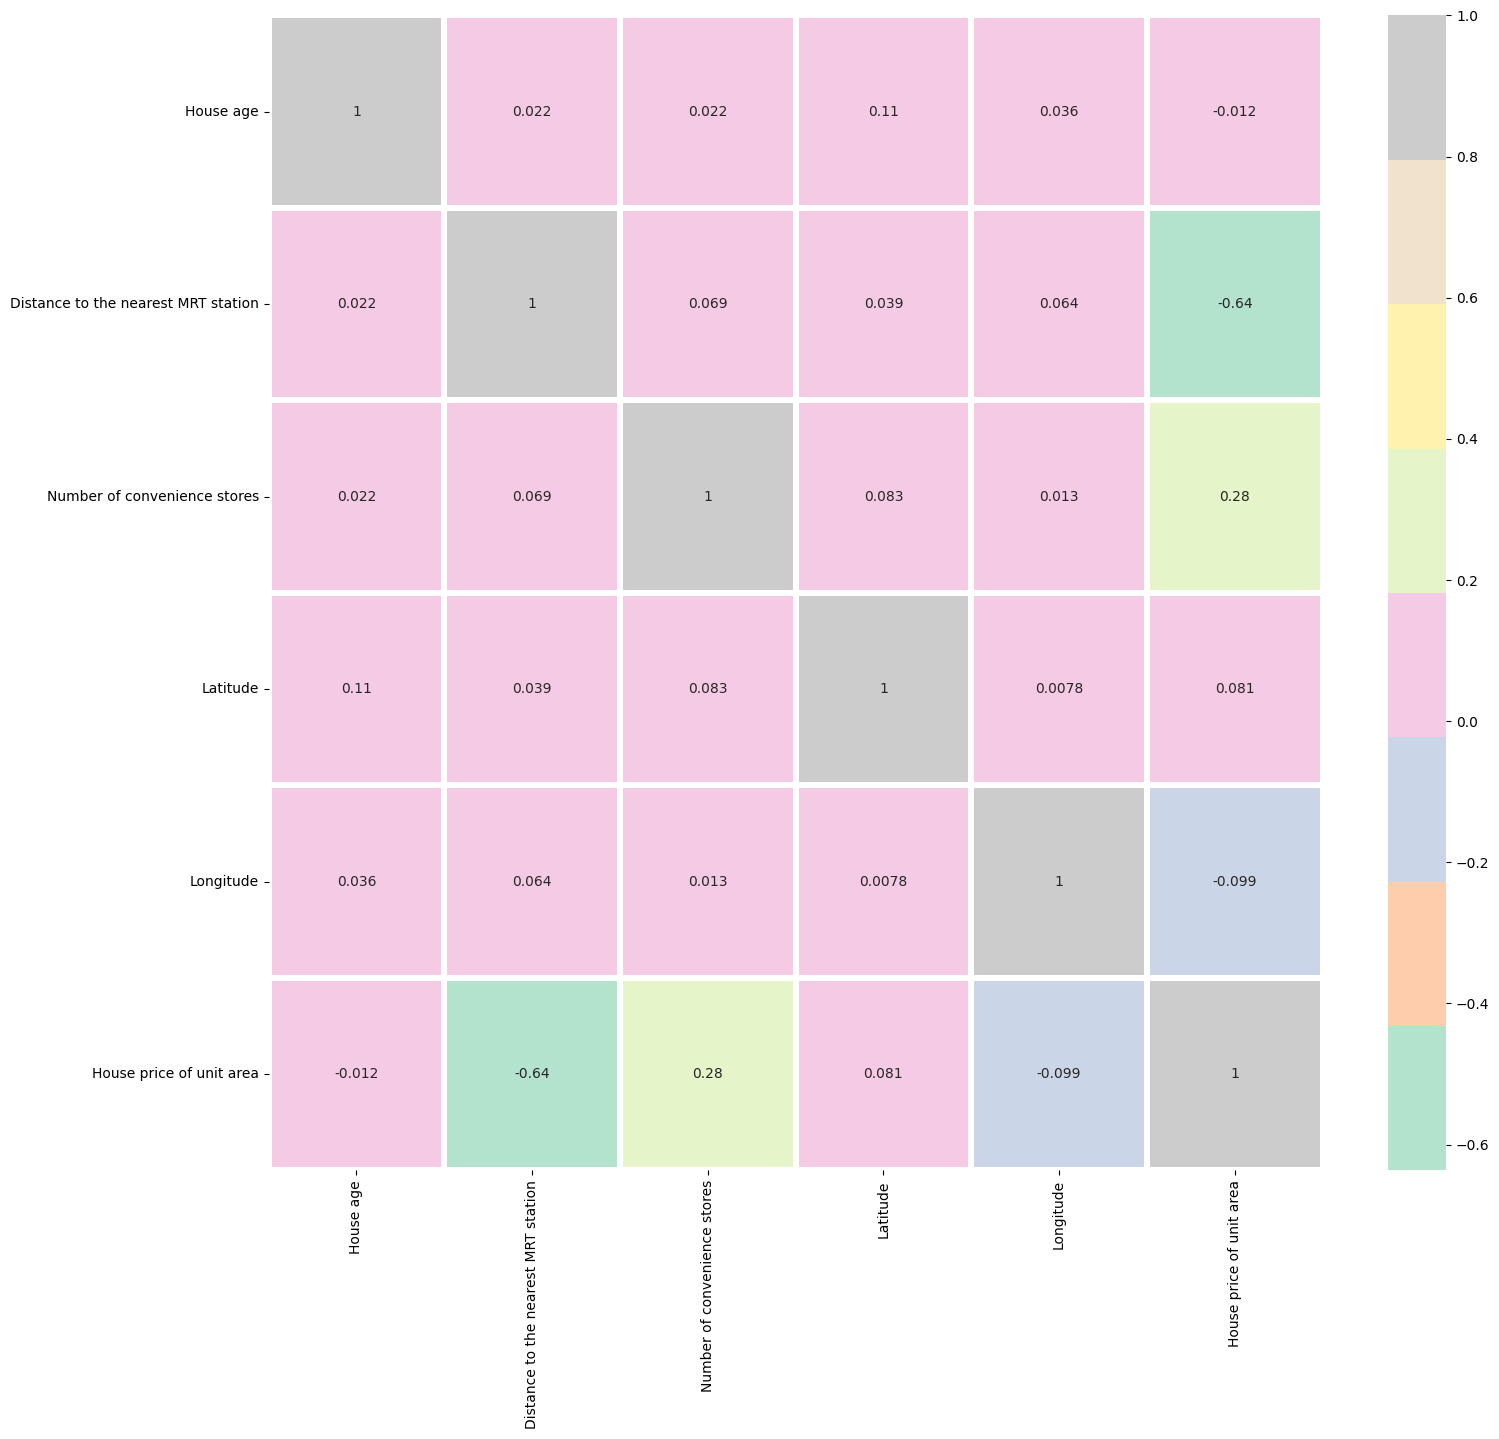

In [19]:
#correlation
plt.figure(figsize=(17,15))
sns.heatmap(num_cols.corr(),annot=True,cmap='Pastel2', linewidths=3)

In [ ]:
outlier_col=df[[]]
for col in outlier_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]

    # Optional: Reset index after each loop to avoid index misalignment
    df.reset_index(drop=True, inplace=True)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
model =StandardScaler()

In [32]:
scaled = model.fit_transform(num_cols)

In [33]:
scaled

array([[-0.43471616,  2.52450329,  1.29797598,  1.38529149,  1.53679991,
        -1.43742806],
       [ 1.4556975 , -0.66129988, -0.78751712,  1.59604714,  0.99131113,
        -0.26261442],
       [-1.47359214,  0.76482921,  1.99314034,  1.25241649,  0.29932618,
        -0.15305728],
       ...,
       [-1.56726128, -0.51269532,  1.29797598, -0.40182985,  0.85767083,
        -0.24453774],
       [ 1.48975901, -0.64541822,  0.25522943,  1.00448848,  1.41036241,
        -0.24259804],
       [-0.54541606, -0.81486622,  0.60281161, -0.85721194,  0.22731888,
         0.53893076]], shape=(414, 6))

In [ ]:
scaled_df=pd.DataFrame(scaled,columns=[[ 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area']])

In [60]:
x = df[[ 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       ]]

In [61]:
y = df["House price of unit area"]

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model= LinearRegression()

In [66]:
model.fit(X_train,y_train)

LinearRegression()

In [67]:
y_pred= model.predict(X_test) #pred
y_pred

array([41.4144135 , 23.27497856, 38.31223598, 34.09705783, 40.04555541,
       33.69002951, 19.75476981, 36.47728988, 34.32813367, 17.76618387,
       26.08057455, 25.95145517, 39.84073221, 28.61664054, 43.21652101,
       31.76444266, 11.31665522, 45.1013608 , 29.18436722, 19.98947981,
       35.59936506, 31.28271613, 41.61073313, 40.64326652, 40.4532469 ,
       40.3932533 , 32.90354199, 36.14310285,  9.75052406, 13.62721478,
       36.4315517 , 11.47910619, 38.98023232, 14.83503931, 32.08767927,
       18.6431252 , -1.94825323, 38.66281709, -2.51218602, 39.13237457,
       39.21816396, 11.11641018,  3.37859774, 39.47489398, 47.93855726,
       33.12605583, 44.81087594, 29.2745157 , 43.45068696, 35.74891692,
       35.9198614 ,  5.45573839, 38.86208737, 31.89178829, 36.87285003,
       34.80048321, 32.73847206, 23.72912427, 45.32899337, 26.77412604,
       43.80357385, 25.86263838, 19.42570237, 38.16593945, 27.54281665,
       32.2370109 , -0.13057146, 31.5964669 , 28.14683164, 36.74

In [68]:
y_test


407    43.588921
275     3.113896
210    47.961563
6      27.637382
392    34.474094
         ...    
135    20.826632
137    30.383836
180    58.815162
290    37.675401
348    29.726401
Name: House price of unit area, Length: 83, dtype: float64

In [69]:
from sklearn.metrics import mean_absolute_error,r2_score

In [70]:
mean_absolute_error(y_test,y_pred)

8.664390714938893

In [71]:
r2_score(y_test,y_pred)*100

63.66983505330596